# 🧪 LAB 12 – SEGMENTATION TECHNIQUES

In [1]:
# STEP 1: Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

(np.float64(-0.5), np.float64(320.5), np.float64(321.5), np.float64(-0.5))

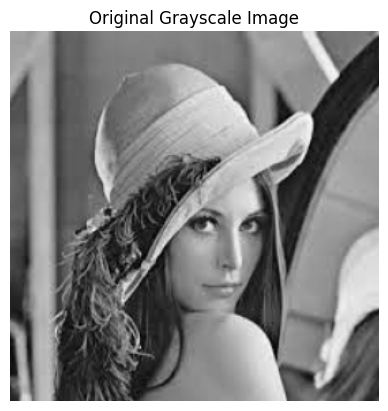

In [2]:
# STEP 2: Load & Display Original Image
img = cv2.imread('/content/Lena.png')
if img is None:
    raise ValueError("Upload Lena.png to Colab")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')

# ✅ TASK 1 – THRESHOLDING TECHNIQUES

(np.float64(-0.5), np.float64(320.5), np.float64(321.5), np.float64(-0.5))

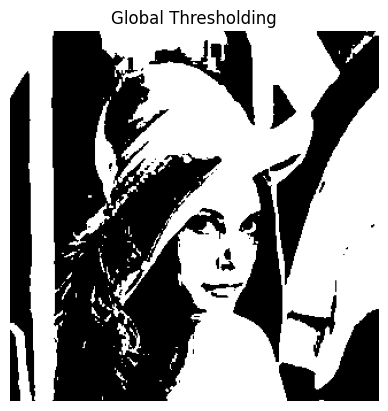

In [3]:
# (a) Global Thresholding
_, global_thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

plt.imshow(global_thresh, cmap='gray')
plt.title("Global Thresholding")
plt.axis('off')

(np.float64(-0.5), np.float64(320.5), np.float64(321.5), np.float64(-0.5))

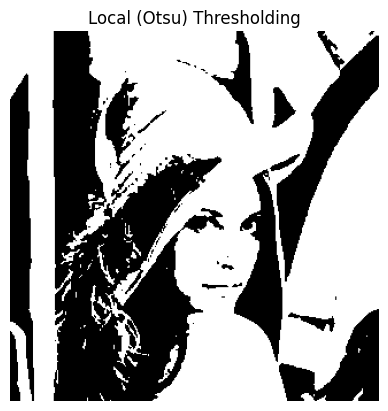

In [4]:
# 🔹 (b) Local (Otsu’s) Thresholding
_, otsu_thresh = cv2.threshold(
    gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.imshow(otsu_thresh, cmap='gray')
plt.title("Local (Otsu) Thresholding")
plt.axis('off')

(np.float64(-0.5), np.float64(320.5), np.float64(321.5), np.float64(-0.5))

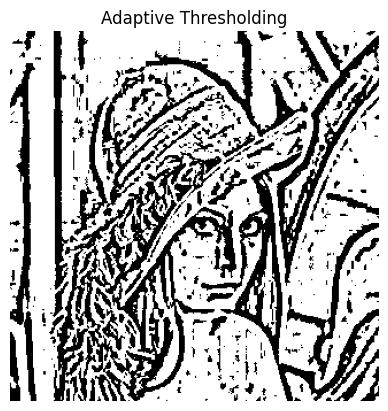

In [5]:
# 🔹 (c) Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(
    gray, 255,
    cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY,
    11, 2)

plt.imshow(adaptive_thresh, cmap='gray')
plt.title("Adaptive Thresholding")
plt.axis('off')

# ✅ TASK 2 – K-MEANS SEGMENTATION (k = 2, 3, 4)

In [6]:
# 🔹 Prepare Image Data
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

In [7]:
# 🔹 K-Means Function
def kmeans_segmentation(k):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(pixel_values)
    centers = np.uint8(kmeans.cluster_centers_)
    segmented = centers[labels]
    return segmented.reshape(img.shape)

In [8]:
# 🔹 Apply K-Means
seg_k2 = kmeans_segmentation(2)
seg_k3 = kmeans_segmentation(3)
seg_k4 = kmeans_segmentation(4)

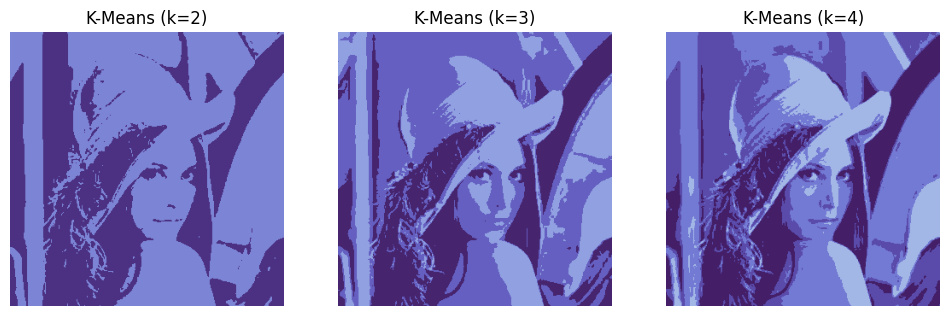

In [9]:
# 🔹 Display K-Means Results
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(seg_k2)
plt.title("K-Means (k=2)")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(seg_k3)
plt.title("K-Means (k=3)")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(seg_k4)
plt.title("K-Means (k=4)")
plt.axis('off')

plt.show()

# ✅ TASK 3 – MEAN SHIFT SEGMENTATION

(np.float64(-0.5), np.float64(320.5), np.float64(321.5), np.float64(-0.5))

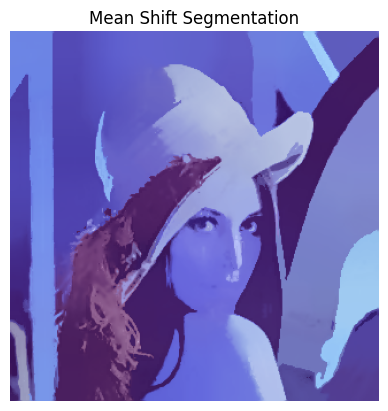

In [10]:
mean_shift = cv2.pyrMeanShiftFiltering(img, sp=20, sr=40)

plt.imshow(mean_shift)
plt.title("Mean Shift Segmentation")
plt.axis('off')

# ✅ TASK 4 – VISUAL COMPARISON OF RESULTS

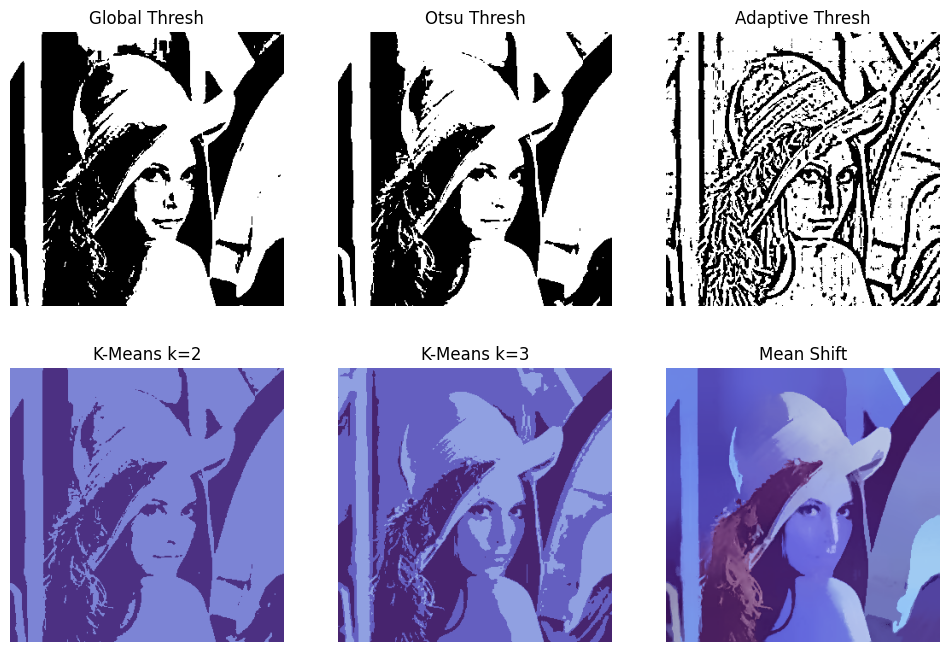

In [11]:
plt.figure(figsize=(12,8))

plt.subplot(2,3,1)
plt.imshow(global_thresh, cmap='gray')
plt.title("Global Thresh")
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(otsu_thresh, cmap='gray')
plt.title("Otsu Thresh")
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(adaptive_thresh, cmap='gray')
plt.title("Adaptive Thresh")
plt.axis('off')

plt.subplot(2,3,4)
plt.imshow(seg_k2)
plt.title("K-Means k=2")
plt.axis('off')

plt.subplot(2,3,5)
plt.imshow(seg_k3)
plt.title("K-Means k=3")
plt.axis('off')

plt.subplot(2,3,6)
plt.imshow(mean_shift)
plt.title("Mean Shift")
plt.axis('off')

plt.show()


# ✅ TASK 5 – DISCUSSION: METHOD STRENGTHS
##🔹 Thresholding

- Simple and fast segmentation technique

- Global thresholding works well for uniform illumination

- Adaptive thresholding performs better under uneven lighting

##🔹 K-Means Segmentation

- Unsupervised clustering-based segmentation

- Produces clear region separation

- Value of k controls segmentation detail

##🔹 Mean Shift Segmentation

- Does not require number of clusters beforehand

- Preserves edges effectively

- Computationally expensive but high-quality results